<a href="https://colab.research.google.com/github/rguille3/PhysicsI_Labs/blob/main/phy_122_errorprop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raul Guillen

Lab 4

# Import Stuff

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt
from numpy import sum as Σ

π = np.pi

def Normal(x, μ, σ):
    ## a.k.a. Gaussian-function given: domain x and two parameters μ, σ
    return exp( - (x-μ)**2/(2*σ**2) ) / sqrt(2*π*σ**2)

def get_histogram(x, data, normalize=False):
    ### binary-search of sorted data for-all domains.
    ### let: N = len(data), then: O ~ (N + len(x))log(N)
    out = searchsorted( sort(data), x, side="right")
    if normalize:
        return x[1:] + (x[:-1] - x[1:])/2, (out[1:] - out[:-1])/len(data)
    return x[1:] + (x[:-1] - x[1:])/2, out[1:] - out[:-1]

def ExpectationValue(X):
    return np.sum(X)/len(X)

def RMSD(f1, f2):
    """
    Root-Mean-Square-Deviation
    compare two functions
    """
    return sqrt( (  Σ( (f1 - f2)**2 )  ) / (len(f1)) )


# Gaussian-Functions

Plot 3 Gaussian-functions using the above defintion

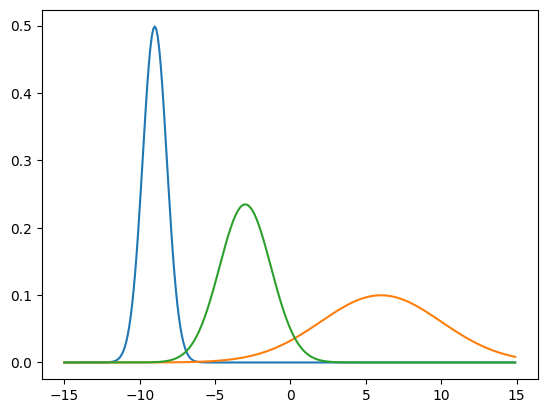

In [74]:
dx = 0.1
x  = arange(-15,15,dx)

plt.plot( x , Normal(x,-9.0, 0.8) )
plt.plot( x , Normal(x, 6.0, 4.0) )
plt.plot( x , Normal(x,-3.0, 1.7) )
plt.show()

The plot above illustrates three Gaussian distributions with distinct parameters, highlighting the influence of the mean (μ) and standard deviation (σ) on their shapes and positions:

1. Blue line: μ = − 9.0 , σ = 0.8A narrow distribution with a small standard deviation, sharply centered at x = − 9.0

2. Orange Line: μ = 6.0 , σ = 4.0A broad distribution with a large standard deviation, centered at x = 6.0

3. Green Line: μ = − 3.0, σ = 1.7A moderately wide distribution, centered at x = − 3.0

This visualization underscores the relationship between the parameters of a Gaussian distribution and its probability density function, demonstrating how σ controls the spread and μ determines the central location.


# Random Variables

Let's use the following convention:


*   random-variables are denoted by CAPITAL letters (e.g. $A$, $B$, $F$, etc.)
*   arbitrarily-well-known-constants are denoted by lowercase letters (e.g. $a$, $b$, $f$, etc.)
*   variables are denoted by GΓΣΣΚ (Greek) letters (e.g. $\mu$, $\sigma$)




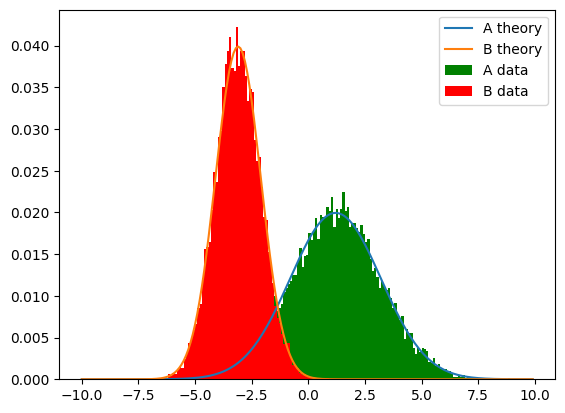

In [75]:
## Gaussian-function parameters
μ1 =  1.2
σ1 =  2.0
μ2 = -3.1
σ2 =  1.0

## domain
dx = 0.1
x  = arange(-10,10,dx)

## define random variables
n = 10000 ## number of samples collected
A = random_normal(μ1, σ1, n) ## random variable A
B = random_normal(μ2, σ2, n) ## random variable B

## make histograms of the random variables
y, hA = get_histogram(x, A, normalize=True)
y, hB = get_histogram(x, B, normalize=True)

## plot histograms with overlied continuous representation
plt.bar(  y , hA, label="A data", color="g", width=0.10)
plt.bar(  y , hB, label="B data", color="r", width=0.10)
plt.plot( x , Normal(x, μ1, σ1) * dx, label="A theory")
plt.plot( x , Normal(x, μ2, σ2) * dx, label="B theory")
plt.legend()
plt.show()

The graph shows the distributions of two random variables, A and B, with their histograms and theoretical Gaussian curves. A, shown in green, has parameters μ_1 = 1.2 and
σ_1 = 2.0, while B, shown in red, has parameters μ_2 = − 3.1 and σ_2 = 1.0
The histograms are normalized and align closely with the theoretical curves, which confirms the random sampling process accurately represents the underlying Gaussian distributions. This comparison demonstrates how the parameters μ and  σ affect the shape and spread of the distributions.

# $F = aA$

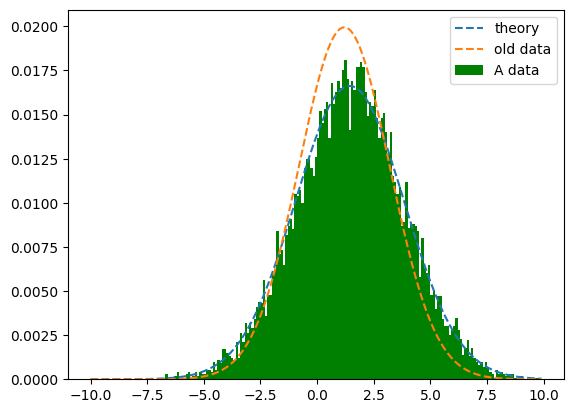

0.0006159204511634479

In [76]:
a = 1.2 ## constant

bins, hA = get_histogram(x, a*A, normalize=True)
σ     = sqrt(a**2 * σ1**2)
μ     = a * μ1

plt.bar(bins, hA, label="A data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ)   * dx, linestyle="dashed", label="theory")
plt.plot(x, Normal(x, μ1, σ1) * dx, linestyle="dashed", label="old data")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hA)

This graph shows the effect of scaling the random variable A by a constant a = 1.2, resulting in a new variable F=aA. The green bars represent the histogram of the scaled variable
F, normalized for comparison. The dashed line labeled "theory" corresponds to the Gaussian distribution of F, calculated with updated parameters μ = a*μ_1 and σ= a*σ_1. For reference, the original distribution of A, with μ_1 =1.2 and σ_1 =2.0, is shown as a second dashed line labeled "old data." The close agreement between the histogram and the theoretical curve demonstrates that scaling a Gaussian random variable correctly adjusts its mean and standard deviation. The RMSD value at the bottom provides a measure of the difference between the histogram and theoretical model.


The Root-Mean-Square-Deviation (RMSD) measures how much the histogram (observed data) differs from the theoretical Gaussian curve. A low RMSD means the experimental data matches the theoretical model well. This shows that the scaling transformation keeps the Gaussian shape of the distribution and correctly changes its mean and standard deviation. The RMSD helps confirm that the results match what we expect based on Gaussian math.

# $F = A + B$

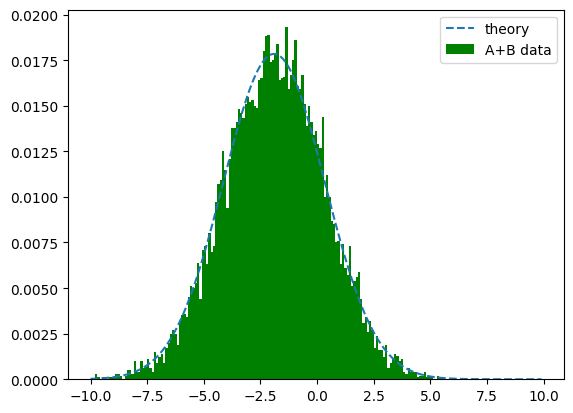

0.0006539257514288697

In [77]:
bins, hAB = get_histogram(x, A+B, normalize=True)

σ = sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

plt.bar( bins , hAB, label="A+B data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

This graph illustrates the distribution of the random variable F = A + B, where A and B are independent Gaussian random variables with parameters μ_1 =1.2, σ_1 =2.0 and μ_2 =−3.1, σ_2 = 1.0, respectively. The green bars represent the normalized histogram of the observed A+B data. The dashed line labeled "theory" represents the theoretical Gaussian distribution for F, derived using the combined parameters μ=μ_1 +μ_2 and σ=sqrt(σ_1^2 +σ_2^2)
The close alignment between the histogram and the theoretical curve, supported by a low RMSD value 0.00065, demonstrates that the sum of two independent Gaussian random variables results in another Gaussian distribution, with its mean and variance determined by the sum of the individual means and variances. This confirms the theoretical behavior of Gaussian distributions under addition.


# $F = aA + bB$

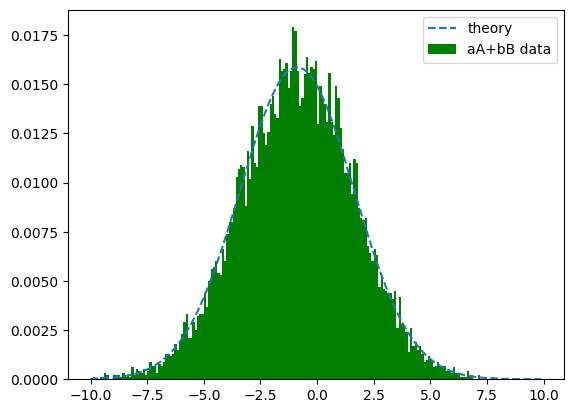

0.0006698280419259924

In [78]:
## constants considered
a = 1.20
b = 0.75

bins, hAB = get_histogram(x, a*A+b*B, normalize=True)
μ = a*μ1 + b*μ2
σ = sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

## plot
plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

This graph illustrates the distribution of the random variable F=aA+bB, where A and B are independent Gaussian random variables with parameters, μ_1 =1.2,σ_1 =2.0 and μ_2 = −3.1, σ_2 =1.0, respectively. The constants a=1.20 and b=0.75 scale A and B before their combination. The green bars represent the normalized histogram of the observed F values. The dashed line labeled "theory" corresponds to the theoretical Gaussian distribution, calculated using μ=a*μ_1 +b*μ_2 and σ=sqrt(a^2*σ_1^2 +b^2*σ_2^2), derived from the principles of error propagation.

The close match between the histogram and the theoretical curve, supported by a low RMSD value 0.00067, confirms that the linear combination of Gaussian random variables produces another Gaussian distribution. This outcome highlights how Gaussian properties are preserved under linear transformations.

# $F = AB$

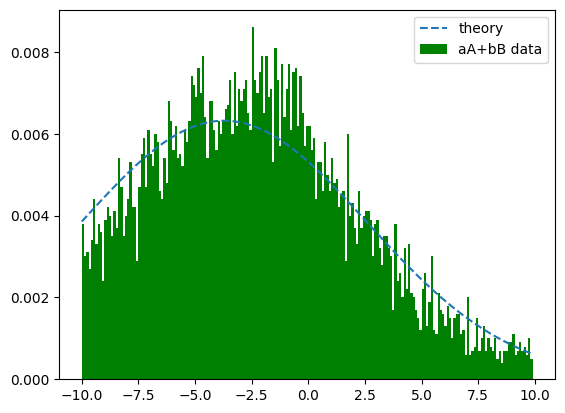

0.0008074579982067174

In [79]:
bins, hAB = get_histogram(x, A*B, normalize=True)
μ = μ1 * μ2
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

This graph depicts the distribution of the random variable F=AB, the product of two independent Gaussian random variables A and B, characterized by parameters μ_1 =1.2,σ_1 =2.0 and μ_2 =−3.1,σ2 =1.0 , respectively. The green bars represent the normalized histogram of the observed F values, while the dashed line labeled "theory" corresponds to the Gaussian distribution derived from error propagation principles. The theoretical parameters are calculated as μ=μ1*μ2 and σ=sqrt(μ^2((μ_1/σ_1 )^2+(μ_2/σ_2 )^2)).

The close match between the histogram and the theoretical curve, supported by a low RMSD value 0.0008, confirms that the linear combination of Gaussian random variables produces another Gaussian distribution.

# DiY
F = a^b * A

### go to the table: https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae and implement one of the **non-linear** entries. Just like the previous 'experiments'. Note that you will be computing the relative error.

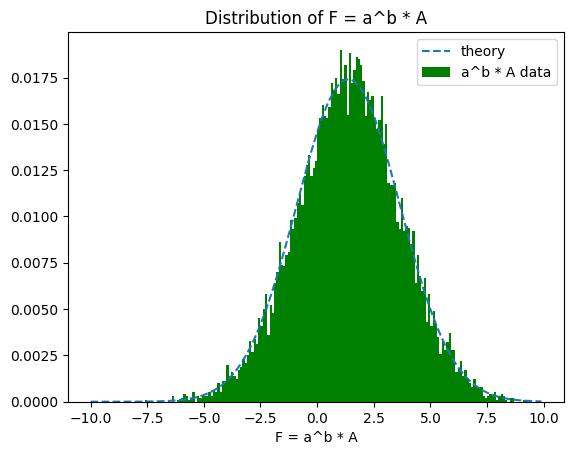

RMSD: 0.0005843681683336929


In [80]:

# Compute F = a^b * A
F = (a**b) * A

# Make histogram for F
bins, hF = get_histogram(x, F, normalize=True)

μ = (a**b) * μ1
σ = μF * sqrt((σ1 / μ1)**2)  # error propagation for F = a^b * A

# Plot observed vs theoretical
plt.bar(bins, hF, label="a^b * A data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.xlabel("F = a^b * A")
plt.title("Distribution of F = a^b * A")
plt.show()

# Calculate RMSD
RMSD_value = RMSD(Normal(bins, μ, σ) * dx, hF)
print("RMSD:", RMSD_value)

This graph illustrates the distribution of the random variable F=ab⋅A, where A is a Gaussian random variable with mean μ_1 and standard deviation σ_1 . The constants a and b scale A through power and multiplication. The green bars represent the normalized histogram of the observed F values, while the dashed line corresponds to the theoretical Gaussian distribution. The theoretical parameters were computed using: μF =a^b*μ1 ,σF =μF *sqrt((μ_1/σ_1)^2).


The calculated RMSD value of 0.000584 indicates a strong agreement between the observed data and the theoretical model, demonstrating that the Gaussian approximation holds well for the transformation F=A*a^b

# Questions \& Conclusion

## Give a summary of what you did in this lab.